## 1. ResNet 50 model
A family of deep neural networks that have achieved state-of-the-art performance on a wide range of computer vision tasks.

굉장히 정교함

## 2. VGG16 model 
ImageNet 데이터셋을 기반으로 만든 초기 이미지 분류 모델.
1,000개의 클래스로 나눈 모델이라 정교함.
하지만 무거움

Color features: The VGG16 model may learn to recognize different colors of cats, such as white, black, gray, or orange.

Texture features: The VGG16 model may learn to recognize different textures of cats, such as short or long hair, or smooth or rough fur.

Body features: The VGG16 model may learn to recognize different parts of a cat's body, such as the head, ears, eyes, or tail.

Posture features: The VGG16 model may learn to recognize different postures of cats, such as sitting, standing, or lying down.

Breed features: The VGG16 model may learn to recognize different breeds of cats, such as Siamese, Persian, or Bengal.

## 3. MobileNet  model
A family of lightweight neural networks that are optimized for mobile devices and have a small memory footprint.

연산량과 정확도

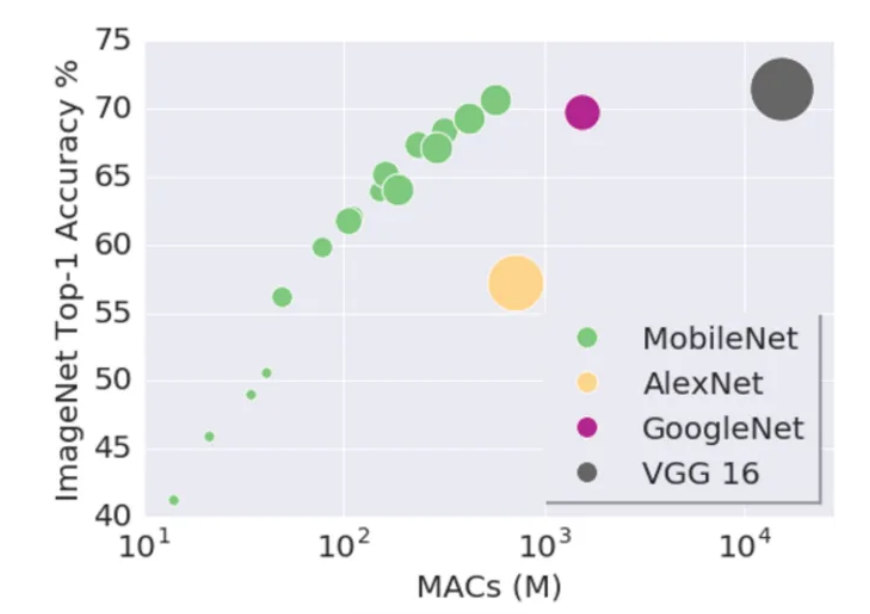

# 최적의 K 값을 어떻게 찾을것인가?

Elbow method: Plot the Within Cluster Sum of Squares (WCSS) for different values of K, and select the value of K where the curve begins to flatten out. This is known as the "elbow" of the curve. This is not always a clear-cut decision, but it can give you an idea of a reasonable range of K values.

Silhouette method: Calculate the Silhouette Coefficient for different values of K. The Silhouette Coefficient measures how similar an object is to its own cluster compared to other clusters. The optimal number of clusters K is the one that maximizes the Silhouette Coefficient. This method is more computationally expensive than the elbow method, but it can give you a more precise answer.

Gap statistic method: Calculate the Gap Statistic for different values of K. The Gap Statistic compares the total within intra-cluster variation for different values of K with their expected values under a null reference distribution of the data. The optimal number of clusters is the value of K that maximizes the gap statistic. This method is more computationally expensive than the elbow method, but it can give you a more precise answer.

In [98]:
import os
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import torch
import torchvision.models as models
import torchvision.transforms as transforms

from glob import glob
from sklearn.model_selection import train_test_split
import yaml
from IPython.display import Image
import dlib, cv2
import pandas as pd
import random
import keras, datetime
from keras.layers import Input, Dense 
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from keras.applications.mobilenet_v2 import MobileNetV2

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter


In [13]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
%cd yolov5

/content/yolov5


In [4]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


In [67]:
cd ./

/content


In [178]:
img_size = 224
base_path = './drive/MyDrive/Dataset/Dataset_for_Image_Clustering/230426_Face_Only' 
# base_path = './drive/MyDrive/Dataset/Dataset_for_Image_Clustering/230426_black' 
# base_path = './drive/MyDrive/Dataset/Dataset_for_Image_Clustering/230426' 
file_list = sorted(os.listdir(base_path))
random.shuffle(file_list)

In [179]:
print(len(file_list))

82


# Pre-Processing

In [118]:
def resize_img(im):
  old_size = im.shape[:2] # old_size is in (height, width) format
  ratio = float(img_size) / max(old_size)
  new_size = tuple([int(x*ratio) for x in old_size])
  # new_size should be in (width, height) format
  im = cv2.resize(im, (new_size[1], new_size[0]))
  delta_w = img_size - new_size[1]
  delta_h = img_size - new_size[0]
  top, bottom = delta_h // 2, delta_h - (delta_h // 2)
  left, right = delta_w // 2, delta_w - (delta_w // 2)
  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
  return new_im, ratio, top, left

# ResNet50 + K-Means를 이용한 특징 추출

In [132]:
def extract_features(directory):
    # Load the ResNet50 model
    model = ResNet50(weights='imagenet', include_top=False)

    features = []
    for img_name in os.listdir(directory):
        # Load the image and preprocess
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Extract features using the ResNet50 model
        features.append(model.predict(x).ravel())

    return np.array(features)

def cluster_images(directory, num_clusters):
    # Extract features from the images
    features = extract_features(directory)

    # Perform K-means clustering on the features
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(features)

    # Reduce the dimensionality of the features to 2 dimensions using PCA
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(features)

    # Plot the clusters using a scatter plot
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans.labels_, cmap='rainbow')
    plt.show()

    print(pca_features.shape)

    return kmeans.labels_

In [133]:
directory = './drive/MyDrive/nyang-ver2/아이유정' 
n_clusters = 3
cluster_images(base_path, n_clusters)

60866560/94765736 [==================>...........] - ETA: 2s

KeyboardInterrupt: ignored

## 위 코드와 차이점은 점에 파일명 심기
###     for i, txt in enumerate(filenames):
###        plt.annotate(txt, (pca_features[i, 0], pca_features[i, 1]))


In [ ]:
def extract_features(directory):
    # Load the ResNet50 model
    model = ResNet50(weights='imagenet', include_top=False)

    features = []
    filenames = []
    for img_name in os.listdir(directory):
        # Load the image and preprocess it
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Extract features using the ResNet50 model
        features.append(model.predict(x).ravel())
        filenames.append(img_name)

    return np.array(features), filenames

def cluster_images(directory, num_clusters):
    # Extract features from the images
    features, filenames = extract_features(directory)

    # Perform K-means clustering on the features
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(features)

    # Reduce the dimensionality of the features to 2 dimensions using PCA
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(features)

    # Plot the clusters using a scatter plot with filename annotations
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans.labels_, cmap='rainbow')
    for i, txt in enumerate(filenames):
        plt.annotate(txt, (pca_features[i, 0], pca_features[i, 1]))
    plt.show()

    return kmeans.labels_

In [ ]:
directory = './drive/MyDrive/nyang-ver2/아이유정' 
n_clusters = 3
cluster_images(directory, n_clusters)

# ResNet50 + PCA 주성분분석 
## K-Means 모델은 K 값을 넣어줘야함. 
## 그렇지 않아도 되는 KNN 모델을 사용해보자.

In [136]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

In [137]:
cd ./

/content


In [144]:
base_path = './drive/MyDrive/Dataset/Dataset_for_Image_Clustering/230426_Face_Only' 
# base_path = './drive/MyDrive/Dataset/Dataset_for_Image_Clustering/230426' 
file_list = sorted(os.listdir(base_path))
random.shuffle(file_list)

In [145]:
def extract_features(directory):
    # Load the ResNet50 model
    model = ResNet50(weights='imagenet', include_top=False)

    features = []
    labels = []
    for img_name in os.listdir(directory):
        if '.cat' in img_name:
          continue

        # Load the image and preprocess it
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_3ch = np.stack([gray, gray, gray], axis=-1)

        x = np.expand_dims(img_3ch, axis=0)
        x = preprocess_input(x)

        # Extract features using the ResNet50 model
        feature = model.predict(x).ravel()
        features.append(feature)
        if "cat" in img_name:
            labels.append(1)
        else:
            labels.append(0)

    return np.array(features), np.array(labels)

In [146]:
def cluster_images_PCA(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 34 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

    # Plot the clusters using a scatter plot with filename annotations
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')
    plt.show()

    return cluster_labels

1/1 [==============================] - 0s 27ms/step
Accuracy of clustering: 100.00%


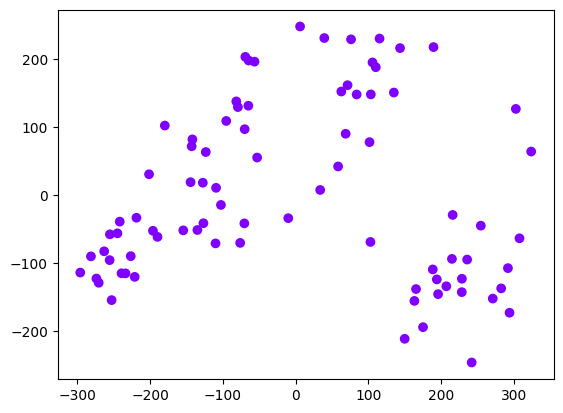

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [147]:
cluster_images_PCA(base_path)

### 위 코드와 차이점은 annotate를 사용해 점 위에 파일 이름 심기

In [142]:
def cluster_images_PCA_label(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 50 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

     # Plot the clusters using a scatter plot with filename annotations
    filenames = os.listdir(directory)
    fig, ax = plt.subplots()
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')
    for i, txt in enumerate(filenames):
        ax.annotate(txt, (pca_features[i, 0], pca_features[i, 1]))
    plt.show()

    return cluster_labels

1/1 [==============================] - 0s 24ms/step
Accuracy of clustering: 100.00%


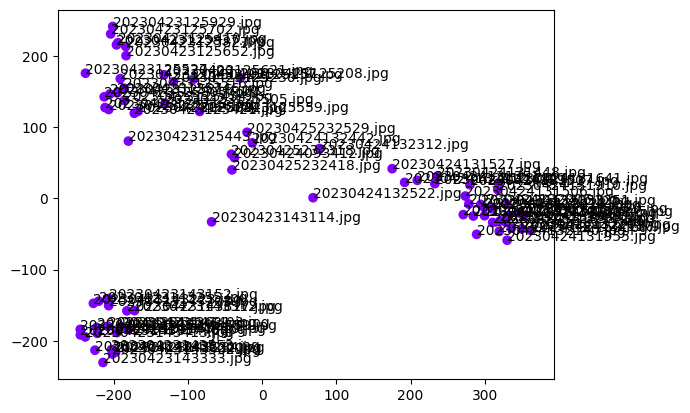

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [143]:
cluster_images_PCA_label(base_path)

# 점 대신 각각의 사진을 넣어보자

In [180]:
from PIL import Image

In [181]:
def cluster_images_PCA_Image(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 50 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

    # Load the images and get their sizes
    img_sizes = []
    img_list = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
        img_sizes.append(img.shape[:2][::-1])
        img_list.append(img)

    # Create a figure with subplots
    fig, ax = plt.subplots()

    # Plot the images as scatter points
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')

    # Add annotations with the image thumbnails
    for i, filename in enumerate(os.listdir(directory)):
        img = cv2.imread(os.path.join(directory, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
        resized_img = cv2.resize(img, (100,100)) # resize the grayscale image
        imagebox = OffsetImage(resized_img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (pca_features[i, 0], pca_features[i, 1]), pad=0, frameon=False)
        ax.add_artist(ab)
    plt.show()

    return cluster_labels

In [ ]:
# base_path = './drive/MyDrive/Dataset/Dataset_for_Image_Clustering/230426_Face_Only' 
base_path = './drive/MyDrive/Dataset/Dataset_for_Image_Clustering/230426' 
file_list = sorted(os.listdir(base_path))
random.shuffle(file_list)

1/1 [==============================] - 0s 23ms/step
Accuracy of clustering: 100.00%


error: ignored

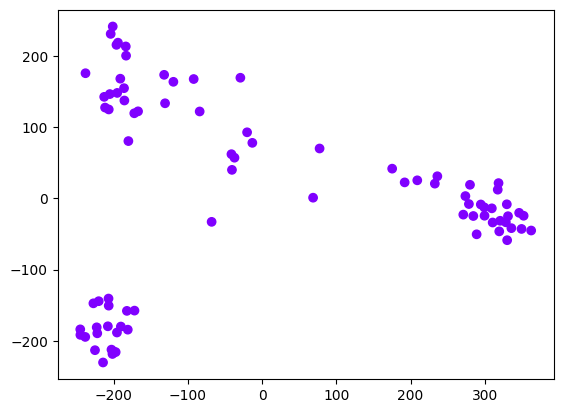

In [ ]:
cluster_images_PCA_Image(base_path)

In [ ]:
def cluster_images_PCA_Image(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 50 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a KMeans clustering algorithm on the reduced features for clustering
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(pca_features)

    # Make predictions on the features
    cluster_labels = kmeans.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

    # Get the number of clusters and centroids
    num_clusters = len(kmeans.cluster_centers_)
    centroids = kmeans.cluster_centers_

    # Load the images and get their sizes
    img_sizes = []
    img_list = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
        img_sizes.append(img.shape[:2][::-1])
        img_list.append(img)

    # Create a figure with subplots
    fig, ax = plt.subplots()

    # Plot the images as scatter points
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')

    # Add annotations with the image thumbnails
    for i, filename in enumerate(os.listdir(directory)):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((100,100))
        img_sizes[i] = img.size[::-1]
        imagebox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (pca_features[i, 0], pca_features[i, 1]), pad=0, frameon=False)
        ax.add_artist(ab)

    centroid_images = []
    for centroid in centroids:
        centroid_image = Image.fromarray(np.uint8(centroid))
        centroid_images.append(centroid_image)

    # Show the plot
    plt.show()

    # Return the cluster labels, number of clusters, and centroids as images
    return cluster_labels, num_clusters, centroid_images

1/1 [==============================] - 0s 104ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of clustering: 30.70%


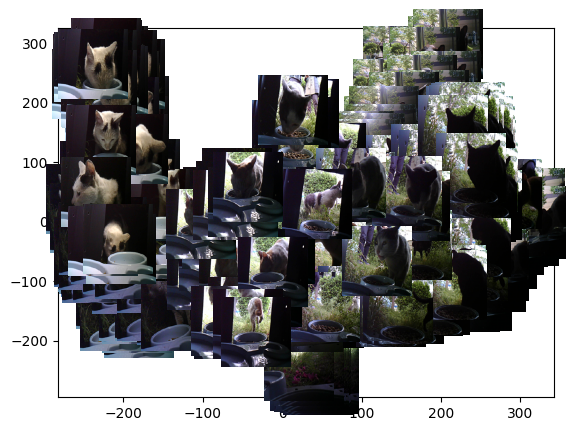

(array([0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 4, 2, 2, 4, 4, 4, 1, 1, 1, 1, 1, 4, 4, 4, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [ ]:
cluster_images_PCA_Image(base_path)

In [ ]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image, ImageDraw

In [ ]:
def get_representative_image(images):
    mean_image = np.mean(images, axis=0)
    distances = np.sum(np.square(images - mean_image), axis=(1, 2, 3))
    min_index = np.argmin(distances)
    return Image.fromarray(images[min_index])

In [ ]:
def cluster_images_PCA_Image(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 50 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features).astype(int)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

    # Load the images and get their sizes
    img_sizes = []
    img_list = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
        img_sizes.append(img.shape[:2][::-1])
        img_list.append(img)

    # Create a figure with subplots
    fig, ax = plt.subplots()

    # Plot the images as scatter points
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')

    # Add annotations with the image thumbnails
    for i, filename in enumerate(os.listdir(directory)):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((100,100))
        img_sizes[i] = img.size[::-1]
        imagebox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (pca_features[i, 0], pca_features[i, 1]), pad=0, frameon=False)
        ax.add_artist(ab)

    # Calculate the centroids of each cluster
    unique_labels = np.unique(cluster_labels)
    centroids = []
    for label in unique_labels:
        mask = cluster_labels == label
        centroid = np.mean(pca_features[mask], axis=0)
        centroids.append(centroid)

    # Create a new blank image and draw the centroids onto it
    img_size = (500, 500)
    img = Image.new('RGB', img_size, color=(255, 255, 255))
    draw = ImageDraw.Draw(img)
    for i, centroid in enumerate(centroids):
        mask = cluster_labels == i
        cluster_images = [img_list[j] for j in range(len(mask)) if mask[j]]
        representative_img = get_representative_image(cluster_images)
        x, y = centroid
        x = int(x * img_size[0])
        y = int((1 - y) * img_size[1])
        img.paste(representative_img, (x, y))

    plt.imshow(img)
    plt.show()


1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:227: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  score = y_true == y_pred


Accuracy of clustering: 0.00%


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


AxisError: ignored

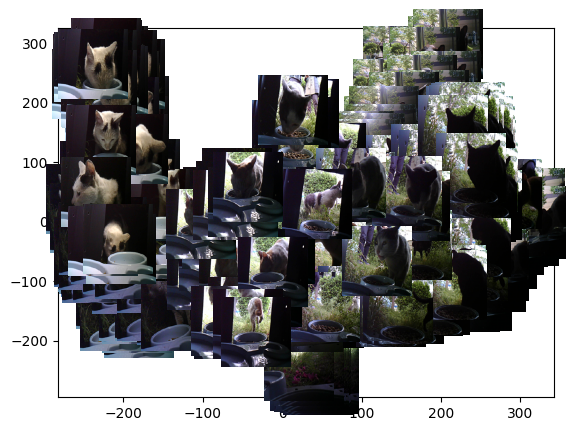

In [ ]:
cluster_images_PCA_Image(base_path)

# VGG16 모델 이용한 특징 추출

In [ ]:
# Load a pre-trained VGG-16 model
model = models.vgg16(pretrained=True)

# Remove the last layer of the model (the classifier)
feature_extractor = torch.nn.Sequential(*list(model.features.children()))

# Set the model to evaluation mode
feature_extractor.eval()

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [76]:
def extract_features(directory):
    # Load the ResNet50 model
    model = VGG16(weights='imagenet', include_top=False)

    features = []
    labels = []
    for img_name in os.listdir(directory):
        if '.cat' in img_name:
          continue

        # Load the image and preprocess it
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_3ch = np.stack([gray, gray, gray], axis=-1)

        x = np.expand_dims(img_3ch, axis=0)
        x = preprocess_input(x)

        # Extract features using the ResNet50 model
        feature = model.predict(x).ravel()
        features.append(feature)
        if "cat" in img_name:
            labels.append(1)
        else:
            labels.append(0)

    return np.array(features), np.array(labels)

In [ ]:
def extract_features(directory):
    model = VGG16(weights='imagenet', include_top=False)
    features = []
    for img_name in os.listdir(directory):
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features.append(model.predict(x).ravel())
    return np.array(features)

In [ ]:
def cluster_images(directory, num_clusters):
    features = extract_features(directory)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(features)
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(features)
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans.labels_, cmap='rainbow')
    plt.show()
    return kmeans.labels_

In [ ]:
directory = './drive/MyDrive/nyang-ver2/아이유정' 
n_clusters = 3
cluster_images(directory, n_clusters)


1/1 [==============================] - 0s 23ms/step


ValueError: ignored

In [ ]:
from matplotlib.colors import ListedColormap
import seaborn as sns


In [77]:
# image Clustering with K-Neighbors
def cluster_images_PCA_Image(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 34 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

    # Load the images and get their sizes
    img_sizes = []
    img_list = []
    filenames = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
        img_sizes.append(img.shape[:2][::-1])
        img_list.append(img)
        filenames.append(filename)

    # Create a color mapping for the filenames
    cmap = ListedColormap(sns.color_palette("husl", n_colors=len(filenames)))

    # Map the cluster labels to the corresponding colors
    colors = [cmap(label) for label in cluster_labels]

    # Create a figure with subplots
    fig, ax = plt.subplots()

    # Plot the images as scatter points
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=colors, cmap=cmap)

    # Add annotations with the image thumbnails
    for i, filename in enumerate(filenames):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((100,100))
        img_sizes[i] = img.size[::-1]
        imagebox = OffsetImage(img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (pca_features[i, 0], pca_features[i, 1]), pad=0, frameon=False)
        ax.add_artist(ab)

    plt.show()

    return cluster_labels

In [78]:
cluster_images_PCA_Image(base_path)

1/1 [==============================] - 0s 20ms/step
Accuracy of clustering: 100.00%


NameError: ignored

1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


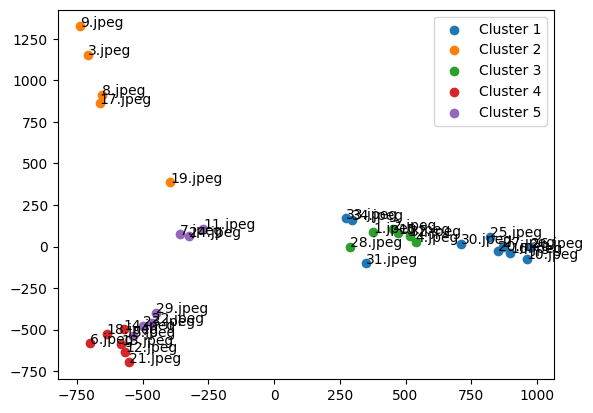

array([2, 2, 1, 2, 4, 3, 4, 1, 1, 0, 4, 3, 3, 3, 2, 0, 1, 3, 1, 0, 3, 4,
       4, 4, 0, 0, 0, 2, 4, 0, 0, 2, 0, 0], dtype=int32)

In [ ]:
directory = 'drive/MyDrive/Dataset/Version1_Dataset'
n_clusters = 5
cluster_images(directory, n_clusters)

# VGG + KNN

In [182]:
def extract_features(directory):
    # Load the ResNet50 model
    model = VGG16(weights='imagenet', include_top=False)

    features = []
    labels = []
    for img_name in os.listdir(directory):
        # Load the image and preprocess it
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)
        x = np.expand_dims(img, axis=0)
        x = preprocess_input(x)

        # Extract features using the ResNet50 model
        feature = model.predict(x).ravel()
        features.append(feature)
        if "cat" in img_name:
            labels.append(1)
        else:
            labels.append(0)

    return np.array(features), np.array(labels)

In [183]:
def cluster_images(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 50 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

    # Plot the clusters using a scatter plot with filename annotations
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')
    plt.show()

    return cluster_labels

1/1 [==============================] - 0s 24ms/step
Accuracy of clustering: 100.00%


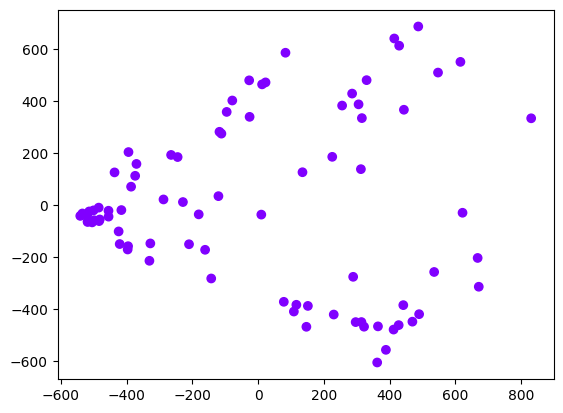

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [184]:
cluster_images(base_path)

In [83]:
def cluster_images(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 50 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

     # Plot the clusters using a scatter plot with filename annotations
    filenames = os.listdir(directory)
    fig, ax = plt.subplots()
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')
    for i, txt in enumerate(filenames):
        ax.annotate(txt, (pca_features[i, 0], pca_features[i, 1]))
    plt.show()

    return cluster_labels

1/1 [==============================] - 0s 31ms/step
Accuracy of clustering: 100.00%


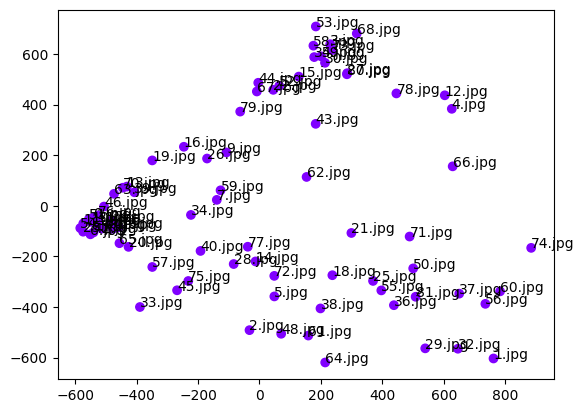

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [84]:
cluster_images(base_path)

In [185]:
def cluster_images(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 50 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

    # Load the images and get their sizes
    img_sizes = []
    img_list = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
        img_sizes.append(img.shape[:2][::-1])
        img_list.append(img)

    # Create a figure with subplots
    fig, ax = plt.subplots()

    # Plot the images as scatter points
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')

    # Add annotations with the image thumbnails
    for i, filename in enumerate(os.listdir(directory)):
        img = cv2.imread(os.path.join(directory, filename))
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
        resized_img = cv2.resize(img, (100,100)) # resize the grayscale image
        imagebox = OffsetImage(resized_img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (pca_features[i, 0], pca_features[i, 1]), pad=0, frameon=False)
        ax.add_artist(ab)
    plt.show()

    return cluster_labels

1/1 [==============================] - 0s 20ms/step
Accuracy of clustering: 100.00%


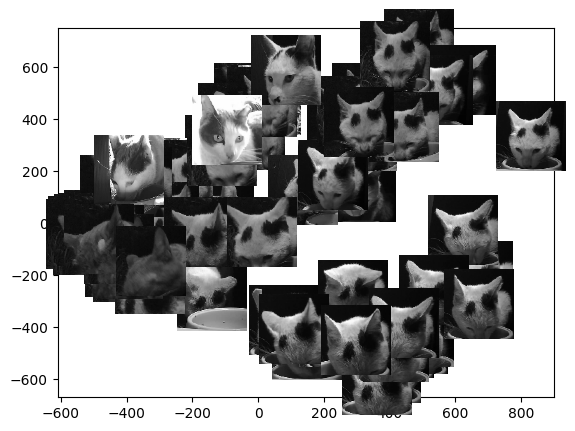

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [186]:
cluster_images(base_path)

# MobileNet 을 이용한 특징 추출

### MobileNet + K-Means


In [158]:
def extract_features(directory):
    # Load the MobileNet model
    model = MobileNet(weights='imagenet', include_top=False)

    features = []
    image_paths = []
    for img_name in os.listdir(directory):
        # Load the image and preprocess it
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Extract features using the MobileNet model
        features.append(model.predict(x).ravel())
        image_paths.append(img_path)

    return np.array(features), np.array(image_paths)

def cluster_images(directory, num_clusters):
    # Extract features from the images
    features, image_paths = extract_features(directory)

    # Perform K-means clustering on the features
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(features)

    # Reduce the dimensionality of the features to 2 dimensions using PCA
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(features)

    # Plot the clusters using a scatter plot with annotated data points
    fig, ax = plt.subplots()
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans.labels_, cmap='rainbow')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

    # Annotate each data point with its corresponding image name
    for i, img_path in enumerate(image_paths):
        img_name = os.path.basename(img_path)
        ax.annotate(img_name, (pca_features[i, 0], pca_features[i, 1]))

    plt.show()

    return kmeans.labels_

In [159]:
cd ./

/content


1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


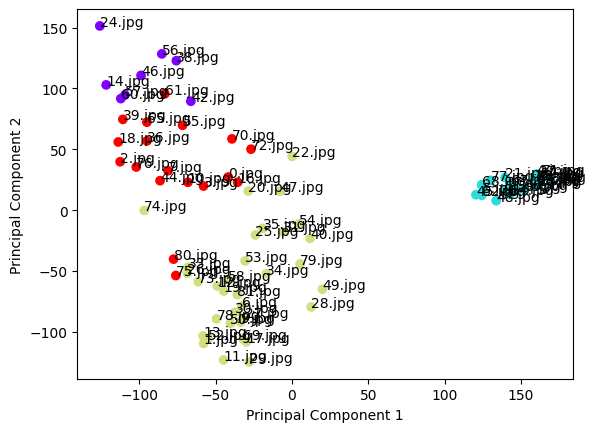

array([2, 1, 1, 1, 3, 3, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 3,
       1, 1, 0, 3, 1, 3, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2,
       2, 1, 2, 3, 2, 3, 2, 2, 3, 3, 2, 1, 0, 2, 1, 2, 2, 1, 3, 2, 0, 3,
       1, 3, 2, 1, 3, 1, 2, 0, 3, 2, 3, 3, 2, 0, 1, 1], dtype=int32)

In [162]:
cluster_images(base_path,4)
# cluster_images('./drive/MyDrive/Dataset/Dataset_for_Ear_Detection/result2',4)

In [ ]:
def extract_features(directory):
    # Load the MobileNet model
    model = MobileNet(weights='imagenet', include_top=False)

    features = []
    for img_name in os.listdir(directory):
        # Load the image and preprocess it
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Extract features using the MobileNet model
        features.append(model.predict(x).ravel())

    return np.array(features)

def cluster_images(directory, num_clusters):
    # Extract features from the images
    features = extract_features(directory)

    # Perform K-means clustering on the features
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(features)

    # Reduce the dimensionality of the features to 2 dimensions using PCA
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(features)

    # Plot the clusters using a scatter plot
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=kmeans.labels_, cmap='rainbow')
    plt.show()

    return kmeans.labels_

1/1 [==============================] - 0s 34ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


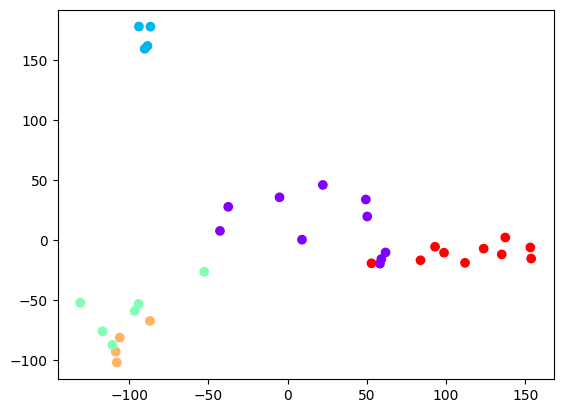

array([0, 0, 1, 0, 3, 2, 0, 1, 1, 4, 0, 2, 2, 2, 0, 4, 1, 2, 0, 4, 2, 3,
       3, 0, 4, 4, 4, 0, 3, 4, 4, 0, 4, 4], dtype=int32)

In [ ]:
cluster_images('drive/MyDrive/Dataset/Version1_Dataset',5)

### MobileNet + K-Neighbor

In [167]:
def extract_features(directory):
    # Load the ResNet50 model
    model = MobileNet(weights='imagenet', include_top=False)

    features = []
    labels = []
    for img_name in os.listdir(directory):
        # Load the image and preprocess it
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)
        x = np.expand_dims(img, axis=0)
        x = preprocess_input(x)

        # Extract features using the ResNet50 model
        feature = model.predict(x).ravel()
        features.append(feature)
        if "cat" in img_name:
            labels.append(1)
        else:
            labels.append(0)

    return np.array(features), np.array(labels)

In [168]:
def cluster_images(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 34 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

    # Plot the clusters using a scatter plot with filename annotations
    plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')
    plt.show()

    return cluster_labels

1/1 [==============================] - 0s 24ms/step
Accuracy of clustering: 100.00%


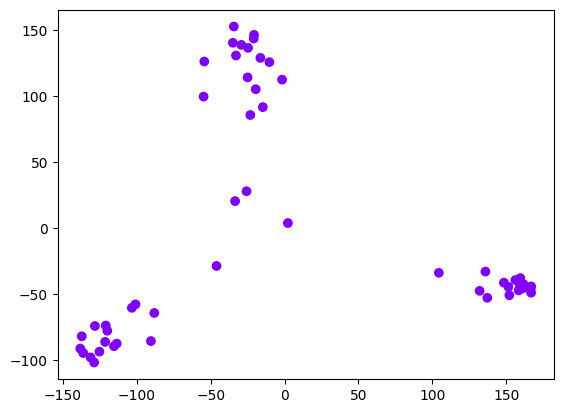

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [169]:
cluster_images(base_path)

In [72]:
def cluster_images(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 34 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

     # Plot the clusters using a scatter plot with filename annotations
    filenames = os.listdir(directory)
    fig, ax = plt.subplots()
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')
    for i, txt in enumerate(filenames):
        ax.annotate(txt, (pca_features[i, 0], pca_features[i, 1]))
    plt.show()

    return cluster_labels

1/1 [==============================] - 0s 21ms/step
Accuracy of clustering: 100.00%


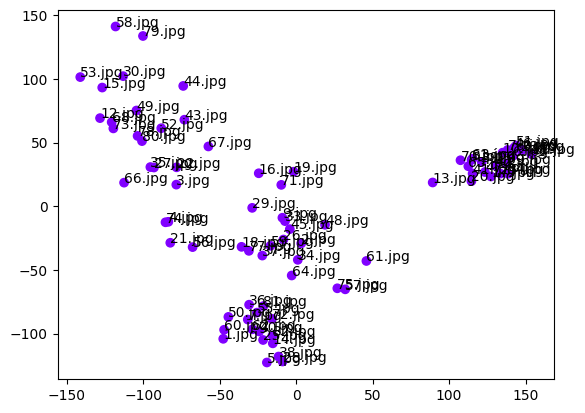

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
cluster_images(base_path)

In [170]:
def extract_features(directory):
    # Load the ResNet50 model
    model = MobileNet(weights='imagenet', include_top=False)

    features = []
    labels = []
    for img_name in os.listdir(directory):
        if '.cat' in img_name:
          continue

        # Load the image and preprocess it
        img_path = os.path.join(directory, img_name)
        img = cv2.imread(img_path)
        img, ratio, top, left = resize_img(img)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_3ch = np.stack([gray, gray, gray], axis=-1)

        x = np.expand_dims(img_3ch, axis=0)
        x = preprocess_input(x)

        # Extract features using the ResNet50 model
        feature = model.predict(x).ravel()
        features.append(feature)
        if "cat" in img_name:
            labels.append(1)
        else:
            labels.append(0)

    return np.array(features), np.array(labels)

In [171]:
def cluster_images_PCA_Image(directory):
    # Extract features from the images
    features, labels = extract_features(directory)

    # Reduce the dimensionality of the features to 34 dimensions using PCA
    pca = PCA(n_components=34)
    pca_features = pca.fit_transform(features)

    # Fit a K-nearest neighbors classifier on the reduced features for clustering
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(pca_features, labels)

    # Make predictions on the features
    cluster_labels = knn.predict(pca_features)

    # Calculate accuracy of clustering
    acc = accuracy_score(labels, cluster_labels)
    print("Accuracy of clustering: {:.2f}%".format(acc * 100))

    # Load the images and get their sizes
    img_sizes = []
    img_list = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
        img_sizes.append(img.shape[:2][::-1])
        img_list.append(img)

    # Create a figure with subplots
    fig, ax = plt.subplots()

    # Plot the images as scatter points
    scatter = ax.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')

    # Add annotations with the image thumbnails
    for i, filename in enumerate(os.listdir(directory)):
        img = cv2.imread(os.path.join(directory, filename))
        resized_img = cv2.resize(img, (100,100)) # resize the grayscale image
        imagebox = OffsetImage(resized_img, zoom=0.5)
        ab = AnnotationBbox(imagebox, (pca_features[i, 0], pca_features[i, 1]), pad=0, frameon=False)
        ax.add_artist(ab)
    plt.show()

    # Get the number of clusters
    num_clusters = len(np.unique(knn.predict(pca_features)))

    print('num_clusters :' , num_clusters)

    return cluster_labels

1/1 [==============================] - 0s 20ms/step
Accuracy of clustering: 100.00%


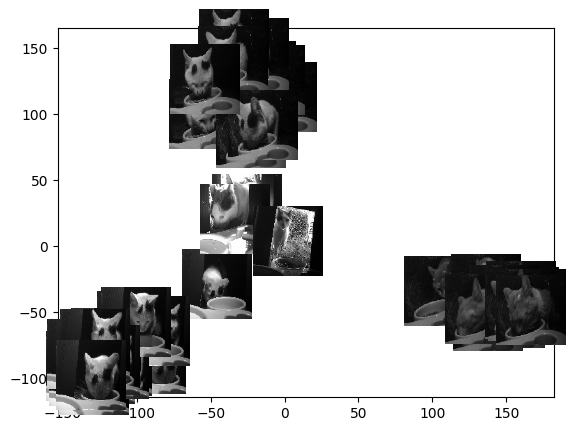

num_clusters : 1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [172]:
cluster_images_PCA_Image(base_path)